In [1]:
# 8.4.3_replacement_analysis_infinite_horizon_def_TC_not_non_decreasing.ipynb
""" 8.4.3 Optimal Replacement under Infinite Planning Horizon when
    Defender TC values are not monotoically non-decreasing """
import numpy_financial as npf
import matplotlib.pyplot as plt
from EngFinancialPy import Asset, pprint_list

In [2]:
# Defender data
MV0 = 16000
MV = [10600, 7800, 5600, 3600, 2000, 1200 ]  
E  = [ 3000, 4200, 5400, 6800, 8400, 9800 ]
marr = 0.1

In [3]:
# Create defdende instance
defender = Asset(MV0, MV, E, marr, age=5, name="Machine B")

In [4]:
# The best challenger's EUAC
challenger_euac = 9000

In [5]:
# Check defender's TC values
TC_def = defender.TC()
pprint_list("TC", TC_def)

TC = 10,000.00   8,060.00   8,380.00   9,360.00   10,360.00   10,800.00   


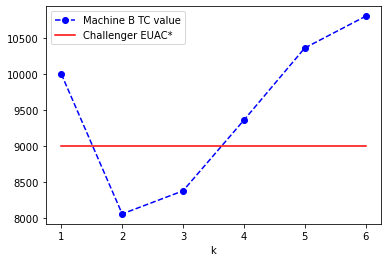

In [6]:
# Plot the defender's TC values
defender.plot_TC(challenger_euac)

In [7]:
# Check if defender's TC values are monotoically non-decreasing
if defender.TC_montotonic():
    print("The Defender's TC values are monotonically non-decreasing")
else:
    print("The Defender's TC values are not monotonically non-decreasing")

The Defender's TC values are not monotonically non-decreasing


In [8]:
# Compute the EPC if defender is replaced by repeatable challenger 
# after k years, for k = 0 to N.
life = defender.useful_life()
EPC = [npf.npv(marr, [0]+TC_def[:k]) + challenger_euac/(marr*(1+marr)**k)
            for k in range(0, life+1) ]
pprint_list("EPC", EPC)

EPC = 90,000.00   90,909.09   90,132.23   89,666.42   89,912.30   90,756.75   91,772.81   


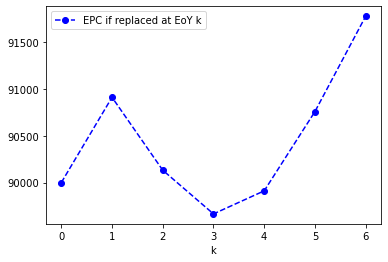

In [9]:
# Plot the replacement plans' EPC values    
fig, ax = plt.subplots()
ax.plot(range(life+1), EPC,'bo',ls='--',label='EPC if replaced at EoY k')
ax.set_xticks(range(life+1))
ax.set_xlabel("k")
ax.legend()
plt.show()

In [10]:
# Determine the optimal replacement time.
epc_star = min(EPC)
kstar = EPC.index(epc_star)
print(f"Replace the defender with repeatable challenger at EoY {kstar}")
print(f"Optimal EPC under opportunity cost approach = {epc_star:,.2f}")
euac_star_CF = (epc_star - MV0)*marr
print(f"Optimal EUAC under cash flow approach = {euac_star_CF:,.2f}")

Replace the defender with repeatable challenger at EoY 3
Optimal EPC under opportunity cost approach = 89,666.42
Optimal EUAC under cash flow approach = 7,366.64
